## 1. Introduction

This notebook presents the exploratory data analysis (EDA) for the Amazon delivery dataset.
The objective is to understand the structure, distribution, and predictive potential of key features
for estimating delivery time.

The analysis focuses on identifying:
- The statistical properties of delivery time
- The relationship between distance, traffic, weather, and delivery duration
- Temporal delivery patterns (hourly and weekly)

This EDA informs feature selection and model design in subsequent phases.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset Overview

This section provides a high-level snapshot of the dataset, including dimensionality,
feature types, and memory usage.


In [62]:
df = pd.read_csv(r"data\processed\amazon_processed.csv")

df.shape


(43648, 15)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43648 entries, 0 to 43647
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       43648 non-null  object 
 1   Agent_Age      43648 non-null  int64  
 2   Agent_Rating   43594 non-null  float64
 3   Order_Date     43648 non-null  object 
 4   Pickup_Time    43648 non-null  object 
 5   Weather        43648 non-null  object 
 6   Vehicle        43648 non-null  object 
 7   Area           43648 non-null  object 
 8   Delivery_Time  43648 non-null  int64  
 9   Category       43648 non-null  object 
 10  distance_km    43648 non-null  float64
 11  day_of_week    43648 non-null  int64  
 12  is_weekend     43648 non-null  int64  
 13  hour           43648 non-null  float64
 14  traffic_level  43648 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 5.0+ MB


In [64]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Order_Date,Pickup_Time,Weather,Vehicle,Area,Delivery_Time,Category,distance_km,day_of_week,is_weekend,hour,traffic_level
0,ialx566343618,37,4.9,2022-03-19,11:45:00,Sunny,motorcycle,Urban,120,Clothing,3.025149,5,1,11.0,3
1,akqg208421122,34,4.5,2022-03-25,19:50:00,Stormy,scooter,Metropolitian,165,Electronics,20.183530,4,0,19.0,4
2,njpu434582536,23,4.4,2022-03-19,08:45:00,Sandstorms,motorcycle,Urban,130,Sports,1.552758,5,1,8.0,1
3,rjto796129700,38,4.7,2022-04-05,18:10:00,Sunny,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,0,18.0,2
4,zguw716275638,32,4.6,2022-03-26,13:45:00,Cloudy,scooter,Metropolitian,150,Toys,6.210138,5,1,13.0,3


## 3. Target Variable Analysis

The target variable for this dataset is `Delivery_Time`, representing the time taken
(in minutes) to complete a delivery. Understanding its distribution is essential
for model selection and evaluation.


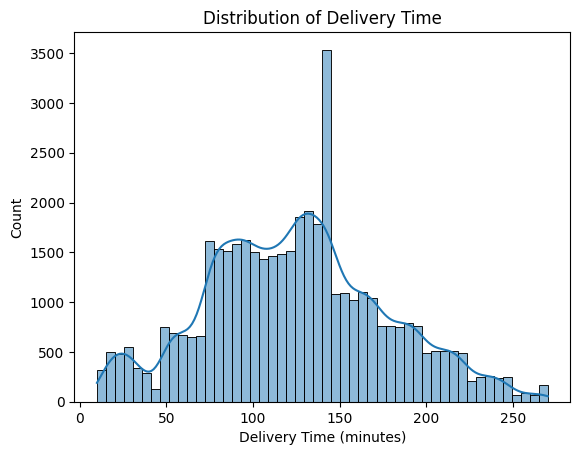

In [65]:
sns.histplot(df["Delivery_Time"], bins=50, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.show()

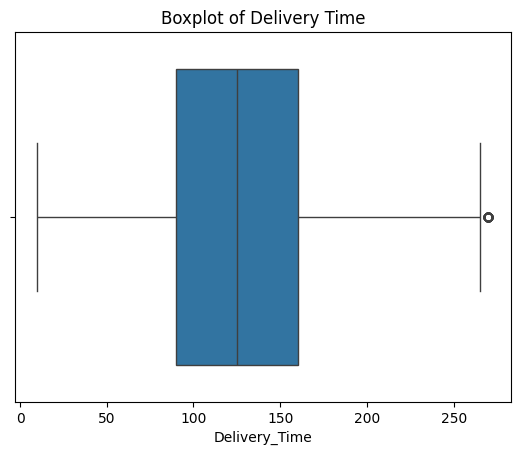

In [51]:
sns.boxplot(x=df["Delivery_Time"])
plt.title("Boxplot of Delivery Time")
plt.show()

In [52]:
df["Delivery_Time"].describe()

count    43648.000000
mean       124.914475
std         51.933163
min         10.000000
25%         90.000000
50%        125.000000
75%        160.000000
max        270.000000
Name: Delivery_Time, dtype: float64

## 4. Missing Value Analysis

This section evaluates the completeness of the dataset and identifies features
with missing values that may require attention during preprocessing.


In [53]:
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]

Agent_Rating    0.001237
dtype: float64

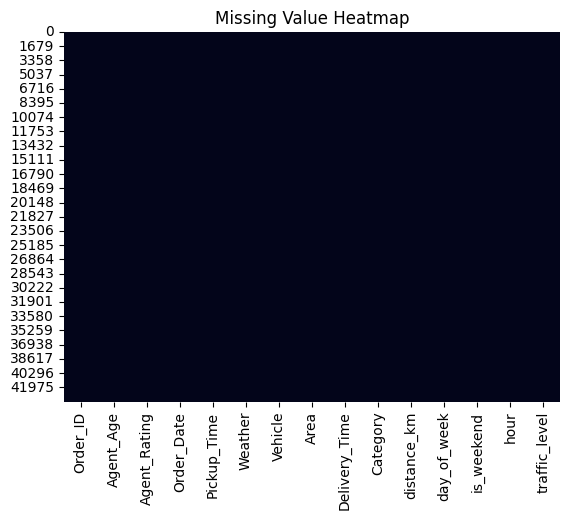

In [54]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

## 5. Numerical Feature Relationships

We examine the relationship between numerical predictors and delivery time
to assess linearity and signal strength.


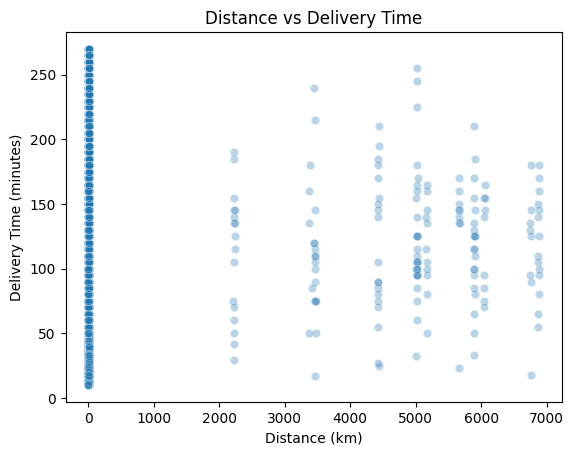

In [55]:
sns.scatterplot(
    x=df["distance_km"],
    y=df["Delivery_Time"],
    alpha=0.3
)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


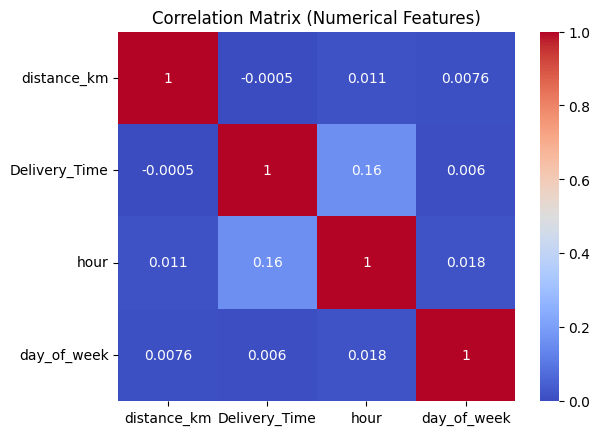

In [56]:
num_cols = ["distance_km", "Delivery_Time", "hour", "day_of_week"]

sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


## 6. Categorical Feature Impact

This section analyzes how categorical features such as traffic, weather,
and vehicle type influence average delivery time.

In [57]:
df.groupby("traffic_level")["Delivery_Time"].mean().sort_values()


traffic_level
1    101.354557
2    126.839669
3    129.424115
4    147.758980
Name: Delivery_Time, dtype: float64

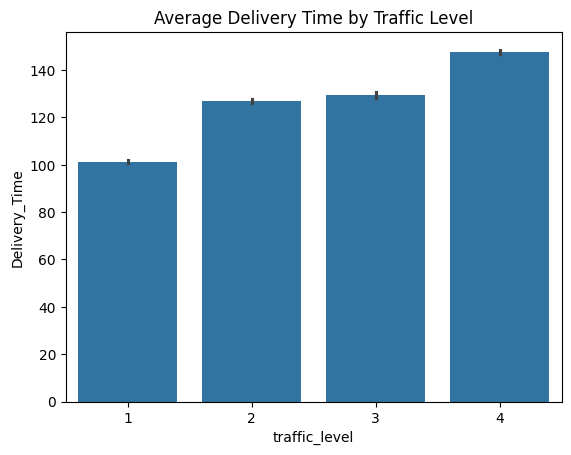

In [58]:
sns.barplot(
    x="traffic_level",
    y="Delivery_Time",
    data=df,
    estimator="mean"
)
plt.title("Average Delivery Time by Traffic Level")
plt.show()

In [59]:
df.groupby("Vehicle")["Delivery_Time"].mean().sort_values()

Vehicle
van            116.170358
scooter        116.346341
motorcycle     131.025667
Name: Delivery_Time, dtype: float64

## 7. Temporal Patterns

Temporal delivery patterns are analyzed to identify peak periods
and potential congestion effects.


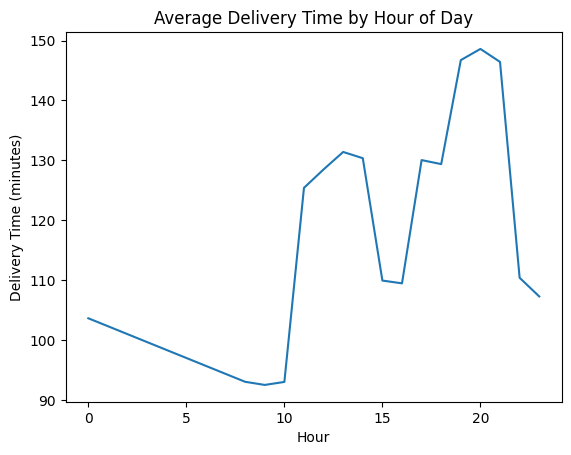

In [ ]:
sns.lineplot(
    x=df.groupby("hour")["Delivery_Time"].mean().index,
    y=df.groupby("hour")["Delivery_Time"].mean().values
)
plt.title("Average Delivery Time by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Delivery Time (minutes)")
plt.show()

In [61]:
df.groupby("is_weekend")["Delivery_Time"].mean()

is_weekend
0    124.895975
1    124.963148
Name: Delivery_Time, dtype: float64

## 8. Key Observations

- Delivery time exhibits right-skewness, indicating outliers and occasional delays.
- Distance shows negligible correlation with delivery duration.
- Traffic level significantly impacts average delivery time, with higher levels corresponding to longer durations.
- Temporal features (hour of day, weekend) show mild but consistent patterns.
- These observations justify the inclusion of non-linear models in later phases.
